In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math
def Initialization_Mult(args):
    print('Initializations')
    gen=[]
    gen_file=[]
    NSGA_files=[]
    root_folder=[]
    pictures_folder=[]
    pictures_folder_pareto=[]
    pictures_folder_filter=[]
    pictures_folder_filter_shape=[]
    
    c=0
    for fol in args.folder:
        root_folder.append(fol)
        gen.append(args.generation[c])
        print(gen)
        folder_path='/home/greales/Desktop/NSGAIIData/2307/'+root_folder[c] # add path to ROOT/
        rf=os.listdir(folder_path)		# get all files in the folder
        NSGA_filenames = find_strings_containing_substring(rf, 'NSGAII_') # Get all root files
        print(rf)
        NSGA_filenames=sort_strings_by_int(NSGA_filenames)
        prefix = folder_path+'/'
        NSGA_files.append([prefix+s for s in NSGA_filenames])
        print(str(gen[c]))
        gen_file.append(folder_path+'/'+find_strings_containing_substring(rf, str(gen[c]))[0]) # Get last generation file or given gen.
        print('pictures/ROOT/'+root_folder[c]+'/Shape/')
        pictures_folder.append('pictures/ROOT/'+root_folder[c]+'/Shape/')
        print(pictures_folder)
        pictures_folder_pareto.append('pictures/ROOT/'+root_folder[c]+'/Pareto/')
        pictures_folder_filter.append('pictures/ROOT/'+root_folder[c]+'/Filter/')
        pictures_folder_filter_shape.append('pictures/ROOT/'+root_folder[c]+'/Filter/Shape_gen'+str(gen[c])+'/')

        create_folder(pictures_folder[c])  # Create required folders to store pictures
        create_folder(pictures_folder_pareto[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter_shape[c])  # Create required folders to store pictures
        c+=1
        print('### Initializations END')
    return gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape


In [14]:
# Fill the class with the required inputs:

class ArgValues:
    def __init__(self):
        self.folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                     "G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06"]
        #self.folder = "G11_objLC_Acte_YSym_SiMPmatch6mm_68Evts_Spline_23-02-09"
        #self.folder ="G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12"
        self.generation = [32,11,13,100,99,21,25]
        self.Ysym = [1,1,1,1,1,1,1]
        self.LYSOL = [1,1,1,1,1,1,1]
        self.save = 1
        self.Shape = 0
        self.ParetoFrontier = 0
        self.Filter = 1
        self.LaunchIndv = 0
args0=ArgValues()

In [4]:
gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape= Initialization_Mult(args0)
gen_file

Initializations
[32]
['NSGAII_3.root', 'NSGAII_14.root', 'NSGAII_11.root', 'NSGAII_17.root', 'NSGAII_2.root', 'NSGAII_0.root', 'NSGAII_5.root', 'NSGAII_12.root', 'NSGAII_16.root', 'NSGAII_8.root', 'NSGAII_7.root', 'NSGAII_29.root', 'NSGAII_26.root', 'NSGAII_13.root', 'NSGAII_4.root', 'NSGAII_18.root', 'NSGAII_27.root', 'NSGAII_28.root', 'NSGAII_9.root', 'NSGAII_10.root', 'NSGAII_31.root', 'NSGAII_20.root', 'NSGAII_25.root', 'NSGAII_32.root', 'NSGAII_24.root', 'NSGAII_30.root', 'NSGAII_22.root', 'NSGAII_23.root', 'NSGAII_1.root', 'NSGAII_6.root', 'NSGAII_19.root', 'NSGAII_15.root', 'NSGAII_21.root']
32
pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/
['pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/']
pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/ already exists.
pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Pareto/ already exists.
pictures/ROOT/G11_objLC_Acte_N

['/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/NSGAII_32.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17/NSGAII_11.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19/NSGAII_13.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24/NSGAII_100.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27/NSGAII_99.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03/NSGAII_21.root']

### Pareto Frontier
Generation:  0
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200


(83.74303667627525, 1000.0)

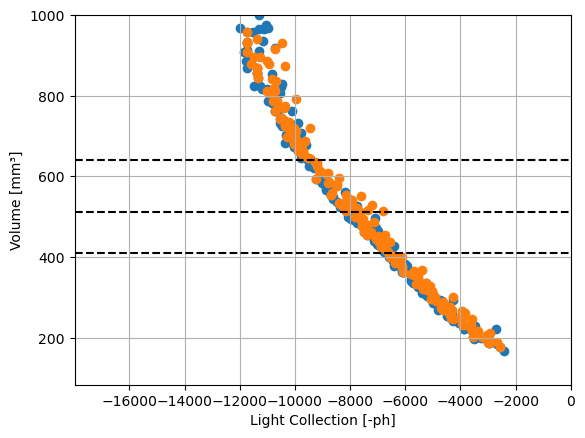

In [5]:
print('### Pareto Frontier')
ims=[]
fig1, ax1 = plt.subplots()
plt.grid()
#plt.xlim([-20000, -2000])
#plt.ylim([200, 900])
# specifying horizontal line type
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--')
plt.axhline(y = 2.4*3*28.5*2, color = 'k', linestyle = '--')
plt.axhline(y = 3.75*3*28.5*2, color = 'k', linestyle = '--')
g=0
#try:
print("Generation: ",g )
# Get required input for plotting the crystal shapes
nn= len(NSGA_files[0])-1
num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(NSGA_files[5][11])
num_indv,num_vars,obj11,obj22,vars_tuple,lstvars = GetRootVariables(NSGA_files[5][8])

ax1.scatter(obj1,obj2)
ax1.scatter(obj11,obj22)

ax1.set_xlabel('Light Collection [-ph]')
ax1.set_ylabel('Volume [mm³]')
#ax1.set_xlim([min(obj1)*1.5, max(obj1)*0.8])
#ax1.set_ylim([min(obj2)*0.5, max(obj2)*1.1])
ax1.set_xlim([min(obj1)*1.5, 0])
ax1.set_ylim([min(obj2)*0.5, 1000])

In [6]:
gen_file[2]

'/home/greales/Desktop/NSGAIIData/2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19/NSGAII_13.root'

### Filter - PF


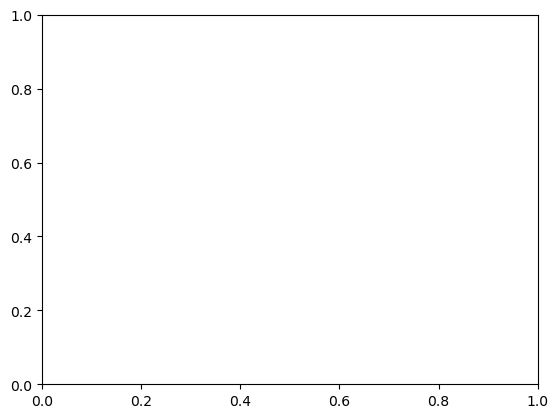

In [7]:
	##############
	### FILTER ###
	##############
print('### Filter - PF')
fig1, ax1 = plt.subplots()

def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o'):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
    print(idxf)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=19, c=colorf, edgecolor=colore, marker=mk,label=lab)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)

In [8]:
plt_filtered_PF(fig1,ax1,gen_file[2],'gray','gray',lab='SiPM 3\\si{\milli\meter}x6\\si{\milli\meter}')


The number of vars per indv is :11
The number indv is :200
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 146, 23, 24, 103, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 132, 164, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


### Filter - PF
The number of vars per indv is :11
The number indv is :200
[0, 70, 46, 69, 85, 59, 77, 27, 41, 54, 50, 13, 26, 76, 42, 32, 36, 62, 131, 92, 97, 45, 8, 29, 35, 20, 58, 80, 18, 10, 44, 56, 61, 66, 55, 83, 98, 57, 52, 49, 64, 71, 12, 25, 96, 82, 51, 30, 33, 65, 40, 73, 21, 9, 7, 17, 86, 38, 22, 14, 53, 93, 95, 19, 6, 37, 47, 24, 28, 39, 149, 67, 43, 60, 81, 87, 74, 15, 4, 5, 31, 23, 3, 2, 1]


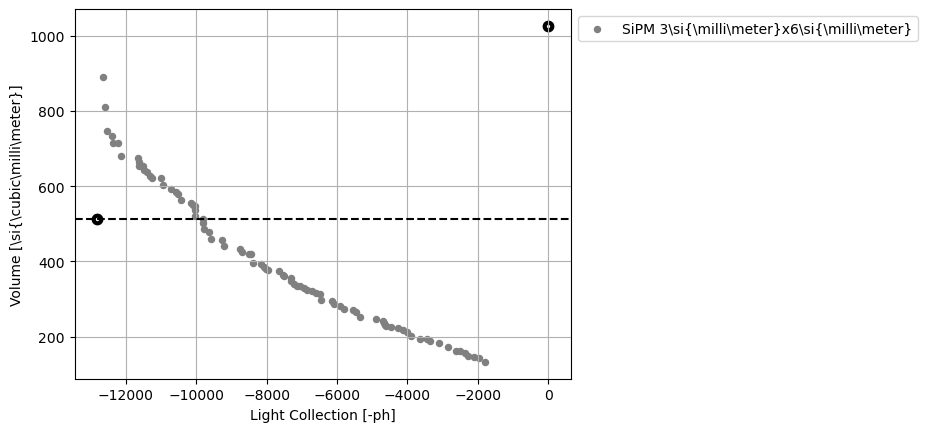

<Figure size 640x480 with 0 Axes>

In [9]:
	##############
	### FILTER ###
	##############
print('### Filter - PF')
fig1, ax1 = plt.subplots()

def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o'):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,5,1)
    print(idxf)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=19, c=colorf, edgecolor=colore, marker=mk,label=lab)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
plt.grid()
ax1.set_xlabel('Light Collection [-ph]')
ax1.set_ylabel('Volume [\\si{\cubic\milli\meter}]')
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--')
#plt.axhline(y = 2.4*3*28.5*2, color = 'k', linestyle = '--')
#plt.axhline(y = 3.75*3*28.5*2, color = 'k', linestyle = '--')
#plt_filtered_PF(fig1,ax1,gen_file[0],'silver','gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}')
#plt_filtered_PF(fig1,ax1,gen_file[1],'gray','black',lab='SiPM 3\\si{\milli\meter}x6\\si{\milli\meter}')
plt_filtered_PF(fig1,ax1,gen_file[4],'gray','gray',lab='SiPM 3\\si{\milli\meter}x6\\si{\milli\meter}')


#ax1.scatter([-14050],[513],s=30, c='white', edgecolor='black', marker='o',linewidths=3)
ax1.scatter([-12809],[513],s=30, c='white', edgecolor='black', marker='o',linewidths=3)

ax1.scatter([0],[6*3*28.5*2],s=30, c='white', edgecolor='black', marker='o',linewidths=3)


ax1.legend(bbox_to_anchor=(1.0, 1))

plt.show()
plt.draw()

['/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/NSGAII_32.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17/NSGAII_11.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19/NSGAII_13.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24/NSGAII_100.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27/NSGAII_99.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03/NSGAII_46.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06/NSGAII_12.root']
The number of vars per indv is :11
The number indv is :200
### Objective values:  199.12902169365347   10   -3062.375143565625   -15.378848936830925
[20.82356187600221, 

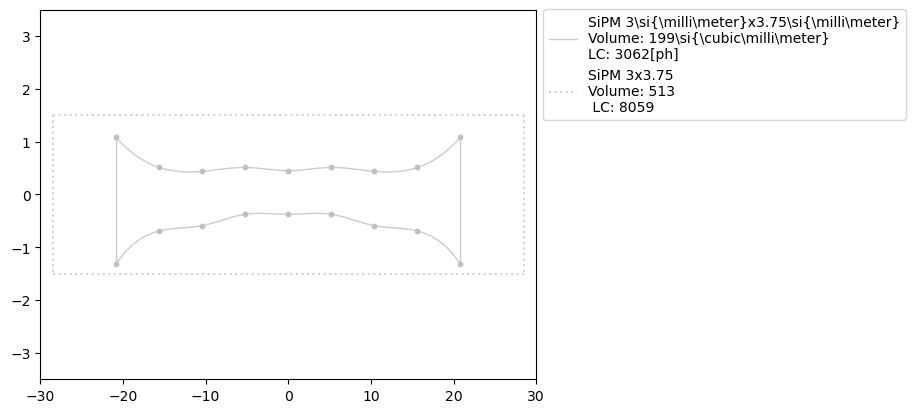

<Figure size 640x480 with 0 Axes>

In [15]:
# Get required input for plotting the crystal shapes
ind=0
folder_path='/home/greales/Desktop/NSGAIIData/2307/'
folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                     "G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06"]

shortname=['LCAvg','LC3x6Avg','LCP50','LOP50','LStP50','LstAvg']
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1, obj2 = [i for i in obj1 if i < 0 and obj2[obj1.index(i)] < 1000], [j for j in obj2 if obj1[obj2.index(j)] < 0 and j < 1000]
    
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

gen=[32,11,13,100,99,46,12]
fnames='NSGAII_'
gen_file=[folder_path+fi+'/'+fnames+str(g)+'.root' for fi,g in zip(folder,gen)]
print(gen_file)

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,6,200)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)


Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()


The number of vars per indv is :11
The number indv is :200
### Objective values:  397.0936835020114   17   -8391.822661326782   -21.13310538540529
NoYSym
LYSOL
The number of vars per indv is :11
The number indv is :200
### Objective values:  521.8360491876167   22   -10031.465390157458   -19.22340437341236
NoYSym
LYSOL
The number of vars per indv is :11
The number indv is :200
### Objective values:  602.7177441787493   25   -10940.96222235825   -18.152712987181385
NoYSym
LYSOL


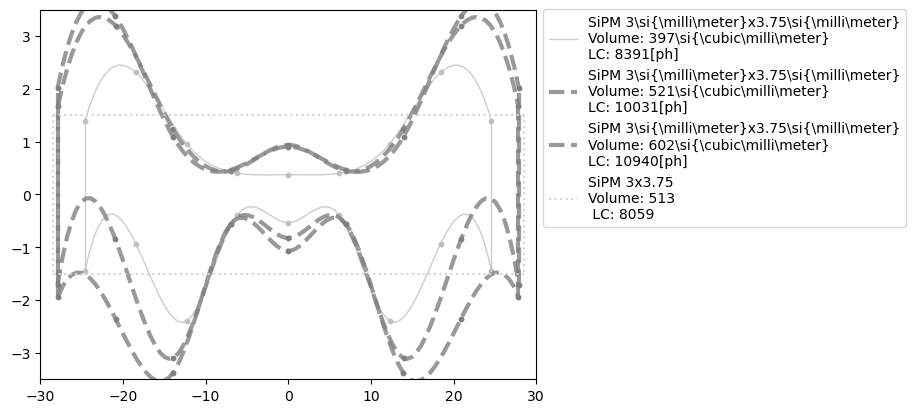

FileNotFoundError: [Errno 2] No such file or directory: 'LatexPics/LYSOShapes_LowerThan513.pdf'

<Figure size 640x480 with 0 Axes>

In [11]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,4,400)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,4,513)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,4,600)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOShapes_LowerThan513.pdf")

In [ ]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,600)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,700)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOShapes_HigherThan513.pdf")

In [ ]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
Volv=[200,300,400,600,700,800]
for Vol in Volv:
    fig1, ax1 = plt.subplots()
    xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,4,Vol)
    Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
               lnstyle='-', lnwidth=1, alph=0.8)

    Plt_DefaultCrystal(fig1,ax1,colori='gray',ls='dotted')

    # Create the legend with the plot name, volume, and light collection
    #legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
    #plt.legend([leg], loc='upper right')
    ax1.legend(bbox_to_anchor=(1., 1.02))

    plt.show()
    plt.draw()
    fig1.tight_layout()
    fig1.savefig("Figures/Shapes/LYSOShapes_"+str(Vol)+".pdf")

In [ ]:

fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,513)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

ax1.plot([-28.5,28.5], [0.375,0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-0.375,-0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [3.375,3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,-28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([28.5,28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')


L1=23
x1=28.5*3/L1/2
xs=1.5
Ls=L1+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

plt.xlim((-32,32))
L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([0,0], [-2.2,2.2],color='black',linestyle='dashdot')

plt.axis('off')

#ax1.annotate('x', xy=(0, 0), xytext=(5, 0),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('$y_{min}$', xy=(-26, 0.25), xytext=(-20, 0.5))
ax1.annotate('$y_{max}$', xy=(-26, 0.25), xytext=(-20, 3.5))
ax1.annotate('$y_{0}$', xy=(-26, 0.25), xytext=(-30, 1.6))
ax1.annotate('$SiPM_{0}$', xy=(-26, 0.25), xytext=(-32, -0.5),rotation=90, c='lightgray')
ax1.annotate('$SiPM_{1}$', xy=(-26, 0.25), xytext=(-27, -0.5),rotation=90, c='gray')

ax1.annotate('Lateral View', xy=(-26, 0.25), xytext=(17, 3.5), c='black')


ax1.annotate('Control Points', xy=(xtop[0]+0.1, ytop[0]+0.1), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('Control Points', xy=([xtop[1]+0.1, ytop[1]+0.1]), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('Control Points', xy=([xtop[2]+0.1, ytop[2]+0.1]), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')

ax1.annotate('z', xy=(0,0), xytext=(5,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('y', xy=(0.9,0), xytext=(0.4,1),
            arrowprops={'arrowstyle': '<-'}, va='center')
#ax1.arrow(0, 0, 3, 0, head_width=0.2)

plt.show()
plt.draw()

fig1.tight_layout()
fig1.savefig("Figures/LYSOSplineSchematic.pdf")

In [ ]:
fig1, ax1 = plt.subplots()

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.plot([-L1,L1], [x1,x1],color='darkgray',linestyle='-')
ax1.plot([-L1,L1], [-x1,-x1],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [x1,-x1],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [x1,-x1],color='darkgray',linestyle='-')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.annotate('$Z_1$', xy=(-L1,xs*1.5), xytext=(+L1,xs*1.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.annotate('z', xy=(0,0), xytext=(5,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('x', xy=(0.,0), xytext=(-0.5,1),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax1.annotate('$Z_0$', xy=(-28.5,2.5), xytext=(+28.5,2.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.annotate('$X_0$', xy=(+31.6,1.55), xytext=(+30.5,-1.7),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)
ax1.annotate('$X_1$', xy=(-31.4,2.4), xytext=(-32.5,-2.6),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)

plt.axis('off')

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOAreaSchematic.pdf")

In [ ]:
import matplotlib.pyplot as plt

# Generate some data for the scatter plot
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 17, 20]

# Create the scatter plot
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Create the legend with the plot name, volume, and light collection
legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
plt.legend([legend_text], loc='upper right')

# Show the plot
plt.show()

In [ ]:
	if(args.save==1):
			imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
			save_name=pictures_folder_filter+imagename
			print(save_name)
			plt.savefig(save_name, format='png', dpi=300, bbox_inches='tight')
	"""except:
		imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
		print("### ERROR: ",pictures_folder_filter+imagename)*/		"""

In [ ]:
import matplotlib.pyplot as plt

def plot_with_error_bars(x, y, xerr):
    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
    ax.set_xlabel("X data")
    ax.set_ylabel("Y data")
    plt.show()
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
xerr = [0.5, 0.4, 0.3, 0.2]

plot_with_error_bars(x, y, xerr)

In [ ]:
!pip install pygmo

In [ ]:
from pygmo import hypervolume

# Assume solutions is a 2D list where each inner list is a solution
solutions = [[1,0], [0.5,0.5], [0,1]]

# Create a hypervolume object
hv = hypervolume(solutions)

# Define the reference point
reference_point = [1.1, 1.1]  # This should be slightly greater than the maximum objective values

# Calculate hypervolume
volume = hv.compute(reference_point)

print(f"The hypervolume is: {volume}")

In [ ]:
test = [[i,j] for i,j in zip(obj1,obj2)]
# Create a hypervolume object
hv = hypervolume(test)

# Define the reference point
reference_point = [4000, 513]  # This should be slightly greater than the maximum objective values

# Calculate hypervolume
volume = hv.compute(reference_point)

print(f"The hypervolume is: {volume}")